In [5]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
type(digits)

sklearn.utils.Bunch

In [6]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digits.data.shape

(1797, 64)

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
digits.target.shape

(1797,)

In [11]:
digits.images[4]

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

In [12]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '4')

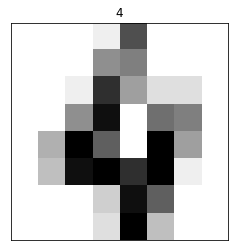

In [16]:
plt.imshow(digits.images[4], cmap = plt.cm.gray_r)

plt.xticks([])
plt.yticks([])

plt.title(digits.target[4])

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 10987)

In [20]:
x_train.shape

(1347, 64)

In [21]:
x_test.shape

(450, 64)

In [22]:
y_train.shape

(1347,)

In [23]:
y_test.shape

(450,)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [27]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
y_predict = knn.predict(x_test)

In [31]:
y_predict[:10]

array([3, 3, 9, 6, 3, 4, 8, 1, 4, 2])

In [32]:
y_test[:10]

array([3, 3, 9, 6, 3, 4, 8, 1, 4, 2])

In [35]:
wrong_predict = [(p,t) for (p,t) in zip(y_predict, y_test) if p!=t]
print(wrong_predict)
print("The prediction accuracy is", "{0:.2%}".format(1-len(wrong_predict)/len(y_test)))

[(1, 8), (7, 4), (1, 4), (1, 8), (8, 6), (3, 9), (1, 8), (3, 9)]
The prediction accuracy is 98.22%


In [37]:
knn.score(x_test, y_test)
print("The prediction accuracy is", "{0:.2%}".format(knn.score(x_test, y_test)))

The prediction accuracy is 98.22%


In [38]:
## Load data
from sklearn.datasets import load_digits
digits = load_digits()

## Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 10987)

## Choosing and creating a model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

## 2.6 Training a model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10, random_state = 100011, shuffle = True)

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = knn, X = digits.data, y = digits.target, cv = kfold)
scores

array([1.        , 0.98888889, 0.98333333, 0.99444444, 0.98333333,
       1.        , 0.95555556, 0.99441341, 0.98324022, 0.97765363])

In [47]:
print(f'Mean Accuracy: {scores.mean():.2%}')
print(f'Std Accuracy: {scores.std():.2}')

Mean Accuracy: 98.61%
Std Accuracy: 0.012


In [50]:
for k in range(1, 30, 2):
    kfold = KFold(n_splits = 10, random_state = 100011, shuffle = True)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(estimator = knn, X = digits.data, y = digits.target, cv = kfold)
    print(f'k={k:<2}  Mean Accuracy: {scores.mean():.2%}    Std Accuracy: {scores.std():.2}')

k=1   Mean Accuracy: 98.66%    Std Accuracy: 0.0094
k=3   Mean Accuracy: 98.77%    Std Accuracy: 0.0086
k=5   Mean Accuracy: 98.61%    Std Accuracy: 0.012
k=7   Mean Accuracy: 98.39%    Std Accuracy: 0.013
k=9   Mean Accuracy: 98.27%    Std Accuracy: 0.013
k=11  Mean Accuracy: 98.22%    Std Accuracy: 0.013
k=13  Mean Accuracy: 98.05%    Std Accuracy: 0.014
k=15  Mean Accuracy: 97.88%    Std Accuracy: 0.013
k=17  Mean Accuracy: 97.77%    Std Accuracy: 0.016
k=19  Mean Accuracy: 97.66%    Std Accuracy: 0.014
k=21  Mean Accuracy: 97.33%    Std Accuracy: 0.014
k=23  Mean Accuracy: 97.27%    Std Accuracy: 0.014
k=25  Mean Accuracy: 97.11%    Std Accuracy: 0.016
k=27  Mean Accuracy: 96.99%    Std Accuracy: 0.018
k=29  Mean Accuracy: 96.77%    Std Accuracy: 0.019
